In [2]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("fisier_fara_diacritice.csv")
df

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_59552\3014923319.py:1: DtypeWarning: Columns (13,37,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fisier_fara_diacritice.csv")


,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,NaN,NaN,"99,959",98.29,NaN,2020,3,2020-03-24,2020-03,Si-a jos costumul si cravata presedinte si imb...
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,NaN,NaN,"66,009",17.33,NaN,2020,3,2020-03-11,2020-03,Despre Vitamina C - s-a intamplat aprobarea i...
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,NaN,NaN,"57,998",31.76,NaN,2020,3,2020-03-16,2020-03,O bine Chiar cred asta. M-am nascut si cand a...
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,NaN,NaN,"53,994",268.63,NaN,2020,3,2020-03-15,2020-03,Asa arata fata medic munca grea salvarea vieti...
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,NaN,NaN,"52,881",13.21,NaN,2020,3,2020-03-11,2020-03,VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949884,2022-06-30,stiripesurse.ro,stiripesurse.ro,679218552100812,NEWS_SITE,RO,Cea mai rapidă sursă de informații și știri. Î...,2014-01-31 14:06:38,658827.0,863198.0,...,NaN,NaN,NaN,NaN,-47.5,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...
949885,2022-06-30,pesurse.ro,pesurse.ro,179523662073502,NEWS_SITE,RO,Aproape tot ce se intampla la tv si nu e dat i...,2010-12-10 23:35:42,28736.0,28244.0,...,NaN,NaN,NaN,NaN,-14.0,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...
949886,2022-06-30,Sinteza Zilei Oficial,SintezaZileiOficial,1703600396518671,TV_SHOW,RO,"Pagina oficială a emisiunii Sinteza Zilei, rea...",2016-02-10 09:16:23,91369.0,139020.0,...,NaN,NaN,NaN,NaN,1.42,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...
949887,2022-06-30,Antena 3,Antena3Oficial,2046461195600068,NEWS_SITE,RO,Antena 3 este cea mai urmărită televiziune de ...,2018-02-16 14:31:50,155838.0,315635.0,...,NaN,NaN,NaN,NaN,1.19,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...


In [56]:
df['year'] = pd.DatetimeIndex(df['Post Created Date']).year
df['month'] = pd.DatetimeIndex(df['Post Created Date']).month
df['date'] =  pd.to_datetime(df['Post Created Date']).dt.strftime('%Y-%m-%d')

df['month_year'] = pd.to_datetime(df['Post Created Date']).dt.to_period('M')
df['week'] = pd.to_datetime(df['Post Created Date']).dt.to_period('W')
df= df[df['Message'].notna()]
print(df)

       Post Created Date                               Page Name  \
0             2020-03-24                          Floriana Jucan   
1             2020-03-11                       Dr. Mihail Pautov   
2             2020-03-16                          Codin Maticiuc   
3             2020-03-15               Sarbatori alaturi de tine   
4             2020-03-11  Ministerul Afacerilor Interne, Romania   
...                  ...                                     ...   
949884        2022-06-30                         stiripesurse.ro   
949885        2022-06-30                              pesurse.ro   
949886        2022-06-30                   Sinteza Zilei Oficial   
949887        2022-06-30                                Antena 3   
949888        2022-06-30                                   Ea.md   

                  User Name       Facebook Id            Page Category  \
0          iamflorianajucan   100044342683507               JOURNALIST   
1              doctormihail   34064

In [9]:
page_df = pd.DataFrame()
page_df["Page Name"] = df["Page Name"]
page_df

,Page Name
0,Floriana Jucan
1,Dr. Mihail Pautov
2,Codin Maticiuc
3,Sarbatori alaturi de tine
4,"Ministerul Afacerilor Interne, Romania"
...,...
949884,stiripesurse.ro
949885,pesurse.ro
949886,Sinteza Zilei Oficial
949887,Antena 3


In [17]:
import re 
page_df['Page Name'] = page_df['Page Name'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
page_df['Page Name_first'] = page_df['Page Name'].apply(lambda x: x.split(' ', 1)[0])
page_df['Page Name_last'] = page_df['Page Name'].apply(lambda x: x.split(' ', 1)[-1])

# Separare nume pagini pentru cautare in lista cu entitati

In [18]:
page_df

,Page Name,Page Name_first,Page Name_last
0,Floriana Jucan,Floriana,Jucan
1,Dr. Mihail Pautov,Dr.,Mihail Pautov
2,Codin Maticiuc,Codin,Maticiuc
3,Sarbatori alaturi de tine,Sarbatori,alaturi de tine
4,"Ministerul Afacerilor Interne, Romania",Ministerul,"Afacerilor Interne, Romania"
...,...,...,...
949884,stiripesurse.ro,stiripesurse.ro,stiripesurse.ro
949885,pesurse.ro,pesurse.ro,pesurse.ro
949886,Sinteza Zilei Oficial,Sinteza,Zilei Oficial
949887,Antena 3,Antena,3


In [60]:
page_df_list = page_df['Page Name'].to_list()
page_df_list

['Floriana Jucan',
 'Dr. Mihail Pautov',
 'Codin Maticiuc',
 'Sarbatori alaturi de tine',
 'Ministerul Afacerilor Interne, Romania',
 'Departamentul pentru Situaţii de Urgenţă',
 'Familia Regala a Romaniei',
 'Zâmbește că Doamne Ferește',
 'Dr. Mihail Pautov',
 'Un show de doi Galbeni',
 'Ministerul Afacerilor Interne, Romania',
 'Un show de doi Galbeni',
 'Un show de doi Galbeni',
 'Antena1',
 'Ministerul Afacerilor Interne, Romania',
 'Ministerul Afacerilor Interne al Republicii Moldova',
 'Dr. Mihail Pautov',
 'Antena1',
 'Ziar Piatra Neamt',
 'Doxologia',
 'Asociatia Happy',
 'Doctor Andrei Laslau',
 'Ion Ceban',
 'Alex Dima',
 'Antena1',
 'Constantin Codreanu',
 'Adrian Vrauko',
 'Primăria Municipiului Aiud',
 'Guvernul României',
 'Revista Semnele Timpului',
 'USR PLUS',
 'Ministerul Afacerilor Interne, Romania',
 'Partidul Social Democrat',
 'Adrian Văncică - Actor.Official.Page',
 'Partidul Naţional Liberal',
 'Antena1',
 'Traian Băsescu',
 'Ministerul Apararii Nationale, Roman

In [19]:
nlp = spacy.load('ro_core_news_sm')
nlp.disable_pipe("parser")
nlp.disable_pipe("tagger")
nlp.disable_pipe("lemmatizer")

# Extragere entitati din postari

In [57]:
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

In [48]:
subset = df.head(10)

In [49]:
%time subset['entities'] = subset['Message'].apply(extract_entities)
subset

CPU times: total: 125 ms
Wall time: 127 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post,entities
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,NaN,"99,959",98.29,NaN,2020,3,2020-03-24,2020-03,Si-a jos costumul si cravata presedinte si imb...,[medicii]
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,NaN,"66,009",17.33,NaN,2020,3,2020-03-11,2020-03,Despre Vitamina C - s-a intamplat aprobarea i...,"[Vitamina C, bolnavilor Covid-, pahare]"
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,NaN,"57,998",31.76,NaN,2020,3,2020-03-16,2020-03,O bine Chiar cred asta. M-am nascut si cand a...,"[bataie, tevi, zece ani, propria democratie, a..."
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,NaN,"53,994",268.63,NaN,2020,3,2020-03-15,2020-03,Asa arata fata medic munca grea salvarea vieti...,"[vietii bolnavi, Haideti respectam, Haideti, e..."
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,NaN,"52,881",13.21,NaN,2020,3,2020-03-11,2020-03,VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...,"[ACESTOR RECOMANDARI RECOMANDARI, sunteti, pe..."
5,2020-03-11,Departamentul pentru Situaţii de Urgenţă,departamenturgente,100058235104668,GOVERNMENT_ORGANIZATION,RO,Aceasta este pagina oficială a Departamentului...,2014-12-08 09:29:07,186576.0,199491.0,...,NaN,"52,332",60.43,NaN,2020,3,2020-03-11,2020-03,VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...,"[ACESTOR RECOMANDARI RECOMANDARI, sunteti, pe..."
6,2020-03-26,Familia Regala a Romaniei,FamiliaRegala,164437050270956,COMMUNITY,RO,Aceasta este singura pagina oficiala Facebook ...,2011-02-03 08:58:47,251498.0,253177.0,...,NaN,"51,619",10.63,NaN,2020,3,2020-03-26,2020-03,"Cu ocazia sarbatoririi zilei nastere, Majestat...",[Majestatea Sa Margareta trimite romanilor vlo...
7,2020-03-14,Zâmbește că Doamne Ferește,ZambeteSiVeselie,101219288135762,ENTERTAINMENT_SITE,RO,Entertainment website,2020-02-13 09:16:51,NaN,NaN,...,NaN,"46,251",230.10,NaN,2020,3,2020-03-14,2020-03,Cand afla pacientul COVID-! (y) Zambeste Doam...,[Doamne Fereste]
8,2020-03-24,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,83384.0,129243.0,...,NaN,"34,572",9.07,NaN,2020,3,2020-03-24,2020-03,Dezinfectant vs. COVID- ; facem propriul dezi...,[]
9,2020-03-12,Un show de doi Galbeni,doi.galbeni,100044628000294,PERSONAL_BLOG,MD,Un show pentru cei care-și doresc libertate în...,2017-10-08 16:11:28,81583.0,125710.0,...,NaN,"32,594",6.08,NaN,2020,3,2020-03-12,2020-03,Episodul - Sustin Campania: #EuStauAcasa. Cor...,"[Sustin Campania, usturoi, ceai fierbinte, spa..."


In [ ]:
df['clean_post'].dropna(inplace=True)

In [58]:
%time df['entities'] = df['Message'].apply(extract_entities)

CPU times: total: 2h 4min 8s
Wall time: 2h 4min 56s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
df

,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post,week,entities
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,"99,959",98.29,NaN,2020,3,2020-03-24,2020-03,Si-a jos costumul si cravata presedinte si imb...,2020-03-23/2020-03-29,"[COVID-19, medicii]"
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,"66,009",17.33,NaN,2020,3,2020-03-11,2020-03,Despre Vitamina C - s-a intamplat aprobarea i...,2020-03-09/2020-03-15,"[Vitamina C, momentan, 12.000, pahare, lamaia,..."
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,"57,998",31.76,NaN,2020,3,2020-03-16,2020-03,O bine Chiar cred asta. M-am nascut si cand a...,2020-03-16/2020-03-22,"[1980, 10 ani, 3, strada noastra caci nu prea ..."
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,"53,994",268.63,NaN,2020,3,2020-03-15,2020-03,Asa arata fata medic munca grea salvarea vieti...,2020-03-09/2020-03-15,"[COVID-19, Haideti, Haideti, epidemii, sistemu..."
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,"52,881",13.21,NaN,2020,3,2020-03-11,2020-03,VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...,2020-03-09/2020-03-15,"[COVID-19, sunteti, persoane, copii, persoane,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949884,2022-06-30,stiripesurse.ro,stiripesurse.ro,679218552100812,NEWS_SITE,RO,Cea mai rapidă sursă de informații și știri. Î...,2014-01-31 14:06:38,658827.0,863198.0,...,NaN,NaN,-47.5,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...,2022-06-27/2022-07-03,"[Spaniolul Roberto Bautista Agut, joi]"
949885,2022-06-30,pesurse.ro,pesurse.ro,179523662073502,NEWS_SITE,RO,Aproape tot ce se intampla la tv si nu e dat i...,2010-12-10 23:35:42,28736.0,28244.0,...,NaN,NaN,-14.0,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...,2022-06-27/2022-07-03,"[Spaniolul Roberto Bautista Agut, joi]"
949886,2022-06-30,Sinteza Zilei Oficial,SintezaZileiOficial,1703600396518671,TV_SHOW,RO,"Pagina oficială a emisiunii Sinteza Zilei, rea...",2016-02-10 09:16:23,91369.0,139020.0,...,NaN,NaN,1.42,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...,2022-06-27/2022-07-03,"[COVID, ultima, saptamana, Mii, oameni, sute, ..."
949887,2022-06-30,Antena 3,Antena3Oficial,2046461195600068,NEWS_SITE,RO,Antena 3 este cea mai urmărită televiziune de ...,2018-02-16 14:31:50,155838.0,315635.0,...,NaN,NaN,1.19,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...,2022-06-27/2022-07-03,"[COVID, ultima, saptamana, Mii, oameni, sute, ..."


# Cautare nume autori in entitati extrase 

In [61]:
df['Matching Names'] = df['entities'].apply(lambda x: [name for name in page_df_list if name in x])
df['Matching Names']

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_59552\2572934280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Matching Names'] = df['entities'].apply(lambda x: [name for name in page_df_list if name in x])


0         []
1         []
2         []
3         []
4         []
          ..
949884    []
949885    []
949886    []
949887    []
949888    []
Name: Matching Names, Length: 949882, dtype: object

In [62]:
df.to_csv("fisier_network.csv")

In [63]:
df_co = pd.read_csv("fisier_network.csv")
df_co

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_59552\3247762939.py:1: DtypeWarning: Columns (14,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_co = pd.read_csv("fisier_network.csv")


,Unnamed: 0,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,...,Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post,week,entities,Matching Names
0,0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,...,98.29,NaN,2020,3,2020-03-24,2020-03,Si-a jos costumul si cravata presedinte si imb...,2020-03-23/2020-03-29,"['COVID-19', 'medicii']",[]
1,1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,...,17.33,NaN,2020,3,2020-03-11,2020-03,Despre Vitamina C - s-a intamplat aprobarea i...,2020-03-09/2020-03-15,"['Vitamina C', 'momentan', '12.000', 'pahare',...",[]
2,2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,...,31.76,NaN,2020,3,2020-03-16,2020-03,O bine Chiar cred asta. M-am nascut si cand a...,2020-03-16/2020-03-22,"['1980', '10 ani', '3', 'strada noastra caci n...",[]
3,3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,...,268.63,NaN,2020,3,2020-03-15,2020-03,Asa arata fata medic munca grea salvarea vieti...,2020-03-09/2020-03-15,"['COVID-19', 'Haideti', 'Haideti', 'epidemii',...",[]
4,4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,...,13.21,NaN,2020,3,2020-03-11,2020-03,VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...,2020-03-09/2020-03-15,"['COVID-19', 'sunteti', 'persoane', 'copii', '...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949877,949884,2022-06-30,stiripesurse.ro,stiripesurse.ro,679218552100812,NEWS_SITE,RO,Cea mai rapidă sursă de informații și știri. Î...,2014-01-31 14:06:38,658827.0,...,NaN,-47.5,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...,2022-06-27/2022-07-03,"['Spaniolul Roberto Bautista Agut', 'joi']",[]
949878,949885,2022-06-30,pesurse.ro,pesurse.ro,179523662073502,NEWS_SITE,RO,Aproape tot ce se intampla la tv si nu e dat i...,2010-12-10 23:35:42,28736.0,...,NaN,-14.0,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...,2022-06-27/2022-07-03,"['Spaniolul Roberto Bautista Agut', 'joi']",[]
949879,949886,2022-06-30,Sinteza Zilei Oficial,SintezaZileiOficial,1703600396518671,TV_SHOW,RO,"Pagina oficială a emisiunii Sinteza Zilei, rea...",2016-02-10 09:16:23,91369.0,...,NaN,1.42,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...,2022-06-27/2022-07-03,"['COVID', 'ultima', 'saptamana', 'Mii', 'oamen...",[]
949880,949887,2022-06-30,Antena 3,Antena3Oficial,2046461195600068,NEWS_SITE,RO,Antena 3 este cea mai urmărită televiziune de ...,2018-02-16 14:31:50,155838.0,...,NaN,1.19,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...,2022-06-27/2022-07-03,"['COVID', 'ultima', 'saptamana', 'Mii', 'oamen...",[]


In [66]:
df_filtered = df[df['Matching Names'].map(len) > 0]
df_filtered.head(50)

,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post,week,entities,Matching Names
12,2020-03-17,Un show de doi Galbeni,doi.galbeni,100044628000294,PERSONAL_BLOG,MD,Un show pentru cei care-și doresc libertate în...,2017-10-08 16:11:28,82864.0,127711.0,...,4.91,NaN,2020,3,2020-03-17,2020-03,Episodul - Marturiile cutremuratoare moldoven...,2020-03-16/2020-03-22,"[127, Diaspora, Italia, Ea, pacientii, acasa, ...","[Diaspora, Diaspora, Diaspora, Diaspora, Diasp..."
15,2020-03-24,Ministerul Afacerilor Interne al Republicii Mo...,MinisterulAfacerilorInterneRM,100064379541625,GOVERNMENT_ORGANIZATION,MD,"Adresa: str. Ştefan cel Mare, nr.75, \nmun.Chi...",2011-07-20 15:04:25,39855.0,40767.0,...,227.32,NaN,2020,3,2020-03-24,2020-03,"Colegii nostri, politisti, carabinieri si poli...",2020-03-23/2020-03-29,"[Colegii, frontiera de la Cahul, oamenii sa st...","[Covid-19, Covid-19, Covid-19]"
19,2020-03-21,Doxologia,doxologia.ro,598093803552882,ACTIVITY_GENERAL,RO,Portal Ortodox - pagină oficială\nhttp://www.d...,2013-03-22 16:07:17,346194.0,382380.0,...,97.59,NaN,2020,3,2020-03-21,2020-03,"Clopotele cheama rugaciune In zi, ora ., chema...",2020-03-16/2020-03-22,"[ora 12.00, 3 minute]","[3 minute, 3 minute, 3 minute, 3 minute, 3 min..."
20,2020-03-27,Asociatia Happy,asociatiahappy,665580956812598,CHARITY_ORGANIZATION,RO,Casa Nicolae este salvarea părinţilor şi bunic...,2014-05-26 15:49:23,NaN,NaN,...,228.72,NaN,2020,3,2020-03-27,2020-03,"O campanie initiata un COPIL: TEODOR GIREADA ,...",2020-03-23/2020-03-29,"[TEODOR GIREADA , Are, 10 ani, 4, Arta Stefan ...","[Botosani, Botosani, Botosani, Botosani, Botos..."
33,2020-03-18,Adrian Văncică - Actor.Official.Page,Actor.Official.Page,100044281037043,ACTOR,RO,Ce mai joc...ce mai filmez...aici postez. Toti...,2013-02-02 17:24:29,233352.0,237517.0,...,1.67,NaN,2020,3,2020-03-18,2020-03,Asociatia Daruieste Viata redirectioneaza veni...,2020-03-16/2020-03-22,"[Asociatia Daruieste Viata redirectioneaza, Co...","[Daruieste Viata, Daruieste Viata, Daruieste V..."
34,2020-03-14,Partidul Naţional Liberal,pnl.ro,100044577722934,POLITICAL_PARTY,RO,Pagina oficială a Partidului Național Liberal....,2011-05-03 13:17:50,334163.0,366538.0,...,34.45,NaN,2020,3,2020-03-14,2020-03,Premierul Ludovic Orban: Partidul National Lib...,2020-03-09/2020-03-15,"[Premierul Ludovic Orban, Partidul National Li...","[Coronavirus, Coronavirus, Coronavirus, Corona..."
36,2020-03-14,Traian Băsescu,PresedinteleTraianBasescu,100044574243295,POLITICIAN,RO,Pagina oficială.,2012-01-15 22:50:32,445536.0,444164.0,...,3.67,NaN,2020,3,2020-03-14,2020-03,Criza Covid- amploare. Inca putem ceva. De bin...,2020-03-09/2020-03-15,"[o luna, 93, 1, greseala, Stare de Urgenta, Ro...","[Coronavirus, Coronavirus, Coronavirus, Corona..."
38,2020-03-17,Radu Preda,RaduCosminPreda,100044464332668,POLITICIAN,RO,Aceasta este pagina oficială a fostului senato...,2016-10-31 12:34:06,17423.0,19867.0,...,23.65,NaN,2020,3,2020-03-17,2020-03,NU cautati vinovatii acolo cazul! Jos mainile ...,2020-03-16/2020-03-22,"[NU, vinovatii, Ei, prima, profesorului Strein...","[Raed Arafat, Raed Arafat, Raed Arafat, Raed A..."
39,2020-03-30,Mihai Morar,mihaimorar,100044438319310,PERSON,RO,wake up artist @ Radio ZU\n\nprezentatorul asi...,2010-01-30 08:51:01,507032.0,512218.0,...,3.09,NaN,2020,3,2020-03-30,2020-03,Cand ajungi acasa mandru prezentat teledon str...,2020-03-30/2020-04-05,"[teledon, 2,6 milioane euro in, 6 ore, pamant,...","[Fundatia Mereu Aproape, Fundatia Mereu Aproap..."
40,2020-03-25,Guvernul României,guv.ro,100068227698835,GOVERNMENT_ORGANIZATION,RO,Bun venit pe pagina oficială a Guvernului Româ...,2013-02-06 08:54:29,110926.0,134886.0,...,50.42,NaN,2020,3,2020-03-25,2020-03,INFORMATI

In [70]:
df_filtered['Count'] = df_filtered['Matching Names'].apply(lambda x: len(x))
df_filtered['Count']

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_59552\3318601770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Count'] = df_filtered['Matching Names'].apply(lambda x: len(x))


12         17
15          3
19        219
20         81
33         88
         ... 
949849      1
949856      3
949858      3
949864      3
949871     49
Name: Count, Length: 121101, dtype: int64

In [72]:
#valori unice
df_filtered['Nume_unice'] = df_filtered['Matching Names'].apply(lambda x: list(set(x)))
df_filtered

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_59552\1452305743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Nume_unice'] = df_filtered['Matching Names'].apply(lambda x: list(set(x)))


,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,year,month,date,month_year,clean_post,week,entities,Matching Names,Count,Nume_unice
12,2020-03-17,Un show de doi Galbeni,doi.galbeni,100044628000294,PERSONAL_BLOG,MD,Un show pentru cei care-și doresc libertate în...,2017-10-08 16:11:28,82864.0,127711.0,...,2020,3,2020-03-17,2020-03,Episodul - Marturiile cutremuratoare moldoven...,2020-03-16/2020-03-22,"[127, Diaspora, Italia, Ea, pacientii, acasa, ...","[Diaspora, Diaspora, Diaspora, Diaspora, Diasp...",17,[Diaspora]
15,2020-03-24,Ministerul Afacerilor Interne al Republicii Mo...,MinisterulAfacerilorInterneRM,100064379541625,GOVERNMENT_ORGANIZATION,MD,"Adresa: str. Ştefan cel Mare, nr.75, \nmun.Chi...",2011-07-20 15:04:25,39855.0,40767.0,...,2020,3,2020-03-24,2020-03,"Colegii nostri, politisti, carabinieri si poli...",2020-03-23/2020-03-29,"[Colegii, frontiera de la Cahul, oamenii sa st...","[Covid-19, Covid-19, Covid-19]",3,[Covid-19]
19,2020-03-21,Doxologia,doxologia.ro,598093803552882,ACTIVITY_GENERAL,RO,Portal Ortodox - pagină oficială\nhttp://www.d...,2013-03-22 16:07:17,346194.0,382380.0,...,2020,3,2020-03-21,2020-03,"Clopotele cheama rugaciune In zi, ora ., chema...",2020-03-16/2020-03-22,"[ora 12.00, 3 minute]","[3 minute, 3 minute, 3 minute, 3 minute, 3 min...",219,[3 minute]
20,2020-03-27,Asociatia Happy,asociatiahappy,665580956812598,CHARITY_ORGANIZATION,RO,Casa Nicolae este salvarea părinţilor şi bunic...,2014-05-26 15:49:23,NaN,NaN,...,2020,3,2020-03-27,2020-03,"O campanie initiata un COPIL: TEODOR GIREADA ,...",2020-03-23/2020-03-29,"[TEODOR GIREADA , Are, 10 ani, 4, Arta Stefan ...","[Botosani, Botosani, Botosani, Botosani, Botos...",81,"[Revolut, CoronaVirus, Botosani]"
33,2020-03-18,Adrian Văncică - Actor.Official.Page,Actor.Official.Page,100044281037043,ACTOR,RO,Ce mai joc...ce mai filmez...aici postez. Toti...,2013-02-02 17:24:29,233352.0,237517.0,...,2020,3,2020-03-18,2020-03,Asociatia Daruieste Viata redirectioneaza veni...,2020-03-16/2020-03-22,"[Asociatia Daruieste Viata redirectioneaza, Co...","[Daruieste Viata, Daruieste Viata, Daruieste V...",88,[Daruieste Viata]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949849,2022-06-30,InfoBistrița.ro,InfoBistrita.ro,113341383419507,MEDIA,RO,"Pagină de reportaje video, live-uri, știri, in...",2019-10-22 13:15:27,38065.0,85961.0,...,2022,6,2022-06-30,2022-06,"IUNIE : La nivelul judetului Bistrita-Nasaud,...",2022-06-27/2022-07-03,"[30 IUNIE 2022, Bistrita-Nasaud, COVID-19, 29....",[Vaccin],1,[Vaccin]
949856,2022-06-30,Expresul,Expresul.md,153534841339061,NEWS_SITE,MD,Știri din Ungheni și Călărași\nSite: Expresul....,2010-09-04 14:44:08,8304.0,8793.0,...,2022,6,2022-06-30,2022-06,"Cititi aici, datele oficiale Covid-, intampla ...",2022-06-27/2022-07-03,"[Covid-19, Telegram]","[Covid-19, Covid-19, Covid-19]",3,[Covid-19]
949858,2022-06-30,Serile Filmului Romanesc,serilefilmuluiromanesc,211081978921225,FESTIVAL,RO,Serile Filmului Românesc\nfestival de film la ...,2011-04-22 17:51:27,15292.0,15836.0,...,2022,6,2022-06-30,2022-06,"Cultura purtator Andrei Giurgia, directorul Se...",2022-06-27/2022-07-03,"[Andrei Giurgia, directorul Serile Filmului Ro...","[Cronicari Digitali, Cronicari Digitali, Croni...",3,[Cronicari Digitali]
949864,2022-06-30,Romania TV,RomaniaTV,100069385142248,MEDIA_NEWS_COMPANY,RO,Pagina oficială România TV. \nwww.romaniatv.net,2011-10-14 13:42:58,1342464.0,1349663.0,...,2022,6,2022-06-30,2022-06,Ce trebuie stie romanii noul val Covid- -->> h...,2022-06-27/2022-07-03,"[Covid-19, >, Romania, sustine Alexandru Rafila]","[Covid-19, Covid-19, Covid-19]",3,[Covid-19]


In [131]:
df_filtered.to_csv("prelucrare_date_retea-liste.csv")

In [132]:
#preluare postari cu mai mult de un nume mentionat
df_filtered_len = df[df['Nume_unice'].map(len) > 1]
df_filtered_len.head(50)

,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post,week,entities,Matching Names,Nume_unice
20,2020-03-27,Asociatia Happy,asociatiahappy,665580956812598,CHARITY_ORGANIZATION,RO,Casa Nicolae este salvarea părinţilor şi bunic...,2014-05-26 15:49:23,NaN,NaN,...,NaN,2020,3,2020-03-27,2020-03,"O campanie initiata un COPIL: TEODOR GIREADA ,...",2020-03-23/2020-03-29,"[TEODOR GIREADA , Are, 10 ani, 4, Arta Stefan ...","[Botosani, Botosani, Botosani, Botosani, Botos...","[Revolut, CoronaVirus, Botosani]"
55,2020-03-10,Partidul Naţional Liberal,pnl.ro,100044577722934,POLITICAL_PARTY,RO,Pagina oficială a Partidului Național Liberal....,2011-05-03 13:17:50,333819.0,363897.0,...,NaN,2020,3,2020-03-10,2020-03,i Combaterea coronavirusului implica efort coo...,2020-03-09/2020-03-15,"[Klaus Iohannis, Uniunii Europene, european, 2...","[Klaus Iohannis, Covid-19, Covid-19, Covid-19,...","[Klaus Iohannis, Covid-19]"
60,2020-03-11,Florian Bodog,florianbodog,100050306147301,POLITICIAN,RO,Medic primar chirurg (chirurgie plastica si es...,2012-10-30 19:35:56,8729.0,9106.0,...,NaN,2020,3,2020-03-11,2020-03,Tinand cont gravitatea situatiei cauzata raspa...,2020-03-09/2020-03-15,"[Guvernului interimar, Ludovic Orban, Coronavi...","[Coronavirus, Coronavirus, Coronavirus, Corona...","[Coronavirus, Ludovic Orban]"
83,2020-03-16,Andreea Marin,AndreeaMarinOfficial,100044308125537,PERSON,RO,www.facebook.com/AndreeaMarinOfficial - aici m...,2010-11-05 11:35:42,1521034.0,1553490.0,...,NaN,2020,3,2020-03-16,2020-03,"Aproape donatori individuali zile sms , numa...",2020-03-16/2020-03-22,"[11000, 3 zile, 8825, mana de lucru, centre de...","[Orange, Telekom Romania Mobile, Orange, Telek...","[Orange, Telekom Romania Mobile]"
113,2020-03-15,Cris-Tim,cristimromania,386352508131045,LOCAL,RO,Pornind de la un simplu chioșc în 1992 și dezv...,2013-07-16 07:36:01,187061.0,187135.0,...,NaN,2020,3,2020-03-15,2020-03,"Dragii nostri, In vederea garantarii continuit...",2020-03-09/2020-03-15,"[Ministerului Sanatatii, COVID-19, Cris-Tim, R...","[Cris-Tim, fabrica]","[fabrica, Cris-Tim]"
116,2020-03-24,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,553151.0,609002.0,...,NaN,2020,3,2020-03-24,2020-03,Declaratie presa sustinuta Presedintele Romani...,2020-03-23/2020-03-29,"[Klaus Iohannis, Prim-ministrul Romaniei, Ludo...","[Klaus Iohannis, Victor Costache, Klaus Iohann...","[Klaus Iohannis, Victor Costache, Ludovic Orban]"
156,2020-03-31,Partidul Naţional Liberal,pnl.ro,100044577722934,POLITICAL_PARTY,RO,Pagina oficială a Partidului Național Liberal....,2011-05-03 13:17:50,336406.0,380565.0,...,NaN,2020,3,2020-03-31,2020-03,i Presedintele Klaus Iohannis sustinut declara...,2020-03-30/2020-04-05,"[Presedintele Klaus Iohannis, COVID-19, premie...","[Raed Arafat, Klaus Iohannis, Violeta Alexandr...","[Raed Arafat, Violeta Alexandru, Klaus Iohannis]"
173,2020-03-15,Emil Boc,EmilBoc.Intotdeaunapentruclujeni,100044600762041,PERSON,RO,Primarul Municipiului Cluj-Napoca,2012-05-25 07:58:37,153813.0,165291.0,...,NaN,2020,3,2020-03-15,2020-03,Masuri limitarea efectelor raspandirii Coronav...,2020-03-09/2020-03-15,"[Coronavirus, COVID-19, Municipiul Cluj-Napoca]","[Coronavirus, Coronavirus, Coronavirus, Munici...","[Coronavirus, Municipiul Cluj-Napoca]"
216,2020-03-29,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,578821.0,646830.0,...,NaN,2020,3,2020-03-29,2020-03,Va rugam informati surse oficiale De intrarea ...,2020-03-23/2020-03-29,"[803, persoane, 27, persoane, carantina, 14 zi...",

In [133]:
df_filtered_len

,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post,week,entities,Matching Names,Nume_unice
20,2020-03-27,Asociatia Happy,asociatiahappy,665580956812598,CHARITY_ORGANIZATION,RO,Casa Nicolae este salvarea părinţilor şi bunic...,2014-05-26 15:49:23,NaN,NaN,...,NaN,2020,3,2020-03-27,2020-03,"O campanie initiata un COPIL: TEODOR GIREADA ,...",2020-03-23/2020-03-29,"[TEODOR GIREADA , Are, 10 ani, 4, Arta Stefan ...","[Botosani, Botosani, Botosani, Botosani, Botos...","[Revolut, CoronaVirus, Botosani]"
55,2020-03-10,Partidul Naţional Liberal,pnl.ro,100044577722934,POLITICAL_PARTY,RO,Pagina oficială a Partidului Național Liberal....,2011-05-03 13:17:50,333819.0,363897.0,...,NaN,2020,3,2020-03-10,2020-03,i Combaterea coronavirusului implica efort coo...,2020-03-09/2020-03-15,"[Klaus Iohannis, Uniunii Europene, european, 2...","[Klaus Iohannis, Covid-19, Covid-19, Covid-19,...","[Klaus Iohannis, Covid-19]"
60,2020-03-11,Florian Bodog,florianbodog,100050306147301,POLITICIAN,RO,Medic primar chirurg (chirurgie plastica si es...,2012-10-30 19:35:56,8729.0,9106.0,...,NaN,2020,3,2020-03-11,2020-03,Tinand cont gravitatea situatiei cauzata raspa...,2020-03-09/2020-03-15,"[Guvernului interimar, Ludovic Orban, Coronavi...","[Coronavirus, Coronavirus, Coronavirus, Corona...","[Coronavirus, Ludovic Orban]"
83,2020-03-16,Andreea Marin,AndreeaMarinOfficial,100044308125537,PERSON,RO,www.facebook.com/AndreeaMarinOfficial - aici m...,2010-11-05 11:35:42,1521034.0,1553490.0,...,NaN,2020,3,2020-03-16,2020-03,"Aproape donatori individuali zile sms , numa...",2020-03-16/2020-03-22,"[11000, 3 zile, 8825, mana de lucru, centre de...","[Orange, Telekom Romania Mobile, Orange, Telek...","[Orange, Telekom Romania Mobile]"
113,2020-03-15,Cris-Tim,cristimromania,386352508131045,LOCAL,RO,Pornind de la un simplu chioșc în 1992 și dezv...,2013-07-16 07:36:01,187061.0,187135.0,...,NaN,2020,3,2020-03-15,2020-03,"Dragii nostri, In vederea garantarii continuit...",2020-03-09/2020-03-15,"[Ministerului Sanatatii, COVID-19, Cris-Tim, R...","[Cris-Tim, fabrica]","[fabrica, Cris-Tim]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949616,2022-06-28,MariusTucă,mariustuca.ro,100044075334248,JOURNALIST,RO,Nu căuta răspunsuri prin cărţile de alchimie\n...,2012-06-04 16:50:29,341615.0,398166.0,...,-16.18,2022,6,2022-06-28,2022-06,"Marius Tuca Show incepe marti, iunie, ora ., ...",2022-06-27/2022-07-03,"[Marius Tuca Show, 28 iunie, de la ora 20.00, ...","[Gandul, Gandul, Gandul, Gandul, Gandul, Gandu...","[Gandul, Alexandru Rafila]"
949669,2022-06-28,Expirat,expiratclub,116581321703582,TOPIC_BAR,RO,Expirat. De prin 2002.,2010-04-24 22:42:11,54735.0,56277.0,...,-22,2022,6,2022-06-28,2022-06,"KUMM revin Expirat, Halele Carol, miercuri, i...",2022-06-27/2022-07-03,"[Expirat, Halele Carol, miercuri, 13 iulie, Ba...","[Expirat, Expirat, Expirat, Expirat, Expirat, ...","[The Mono Jacks, Expirat]"
949706,2022-06-28,Alexandra Dobre,alexandradobre.ro,100052885101473,PERSON,RO,Președinte Asociația Institutul pentru Îmbătrâ...,2014-03-31 15:09:49,12817.0,12815.0,...,-2.53,2022,6,2022-06-28,2022-06,Maine vedem emisiunile Click.ro ora :! Povesti...,2022-06-27/2022-07-03,"[Maine, Click.ro, Romania, Fundatia Dan Voicul...","[Click.ro, Click.ro, Click.ro, Click.ro, Click...","[Click.ro, Fundatia Dan Voiculescu, Centrul me..."
949743,2022-06-29,Ministerul Finantelor al Republicii Moldova,MinisterulFinantelorRM,100064840712170,GOVERNMENT_ORGANIZATION,MD,Ministerul Finanțelor al Republicii Moldova,2011-04-11 06:58:39,13957.0,15575.0,...,-3.0,2022,6,2022-06-29,2022-06,Proiectul lege ratificarea Memorandumului Repu...,2022-06-27/2022-07-03,"[Republica Moldova, macrofinanciara, Guvern Ex...","[Parlamentul Re

In [144]:
#cautare relatii in fiecare postare
window_size = 1
relationships = []

for i in range(df_filtered_len.index[-1]):
    end_i = min(i+1, df_filtered_len.index[-1])
    char_list = sum((df_filtered_len.loc[i: end_i].Nume_unice), [])
    
    # Stergere relatii intre celeasi persoane
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [145]:
relationship_df = pd.DataFrame(relationships)
relationship_df

,source,target
0,Revolut,CoronaVirus
1,CoronaVirus,Botosani
2,Revolut,CoronaVirus
3,CoronaVirus,Botosani
4,Klaus Iohannis,Covid-19
...,...,...
68960,Click.ro,Fundatia Dan Voiculescu
68961,Fundatia Dan Voiculescu,"Centrul medical ""DR. FURTUNA DAN"""
68962,Covid-19,Parlamentul Republicii Moldova
68963,Covid-19,Parlamentul Republicii Moldova


In [196]:
name = 'Diana Iovanovici Șoșoacă'  # Name to check
column_name = 'source'  # Column name to search in

if name in relationship_df[column_name].values:
    print(f"The name '{name}' is present in the DataFrame.")
else:
    print(f"The name '{name}' is not found in the DataFrame.")


The name 'Diana Iovanovici Șoșoacă' is not found in the DataFrame.


In [146]:
# Sortare cazuri permutate
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,CoronaVirus,Revolut
1,Botosani,CoronaVirus
2,CoronaVirus,Revolut
3,Botosani,CoronaVirus
4,Covid-19,Klaus Iohannis
...,...,...
68960,Click.ro,Fundatia Dan Voiculescu
68961,"Centrul medical ""DR. FURTUNA DAN""",Fundatia Dan Voiculescu
68962,Covid-19,Parlamentul Republicii Moldova
68963,Covid-19,Parlamentul Republicii Moldova


In [147]:
#agregare dupa numarul aparitiilor pentru fiecare legatura
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()
relationship_df

,source,target,value
0,CoronaVirus,Revolut,2
1,Botosani,CoronaVirus,4
2,Covid-19,Klaus Iohannis,431
3,Coronavirus,Ludovic Orban,124
4,Orange,Telekom Romania Mobile,22
...,...,...,...
4924,Digi24,Sebastian Burduja,2
4925,Dan Carbunaru,Sebastian Burduja,2
4926,Alexandru Rafila,Gandul,2
4927,Click.ro,Fundatia Dan Voiculescu,2


# Filtrare entitati preluate gresit

In [148]:
relationship_df_filtrat = relationship_df[relationship_df["source"].str.contains("Covid-19|Cluj|Diaspora|Botosani|Maramures|Coronavirus|CoronaVirus") == False]
relationship_df_filtrat

,source,target,value
4,Orange,Telekom Romania Mobile,22
5,Cris-Tim,fabrica,2
6,Klaus Iohannis,Victor Costache,374
7,Ludovic Orban,Victor Costache,242
8,Raed Arafat,Violeta Alexandru,10
...,...,...,...
4924,Digi24,Sebastian Burduja,2
4925,Dan Carbunaru,Sebastian Burduja,2
4926,Alexandru Rafila,Gandul,2
4927,Click.ro,Fundatia Dan Voiculescu,2


In [157]:
relationship_df_filtrat2 = relationship_df_filtrat[relationship_df_filtrat["target"].str.contains("Covid-19|Cluj|Diaspora|Botosani|Maramures|Coronavirus|CoronaVirus|fabrica") == False]
relationship_df_filtrat2

,source,target,value
4,Orange,Telekom Romania Mobile,22
6,Klaus Iohannis,Victor Costache,374
7,Ludovic Orban,Victor Costache,242
8,Raed Arafat,Violeta Alexandru,10
9,Klaus Iohannis,Violeta Alexandru,12
...,...,...,...
4924,Digi24,Sebastian Burduja,2
4925,Dan Carbunaru,Sebastian Burduja,2
4926,Alexandru Rafila,Gandul,2
4927,Click.ro,Fundatia Dan Voiculescu,2


In [165]:
relationship_df_filtrat2.to_csv("date_filtrate_retea.csv")

In [174]:
relationship_df_filtrat2 = pd.read_csv("date_filtrate_retea.csv")
relationship_df_filtrat2

,Unnamed: 0,source,target,value
0,4,Orange,Telekom Romania Mobile,22
1,6,Klaus Iohannis,Victor Costache,374
2,7,Ludovic Orban,Victor Costache,242
3,8,Raed Arafat,Violeta Alexandru,10
4,9,Klaus Iohannis,Violeta Alexandru,12
...,...,...,...,...
3507,4924,Digi24,Sebastian Burduja,2
3508,4925,Dan Carbunaru,Sebastian Burduja,2
3509,4926,Alexandru Rafila,Gandul,2
3510,4927,Click.ro,Fundatia Dan Voiculescu,2


# Creare relatii cu NetworkX

In [166]:
G = nx.from_pandas_edgelist(relationship_df_filtrat2, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value",
                            create_using = nx.Graph())

# Vizualizare Pyvis: in asta se vede tot perfect si se poate da zoom, dar incarca mai greut

In [222]:
from pyvis.network import Network
net = Network(notebook = True, cdn_resources='remote', width="1000px", height="700px", bgcolor='#222222', font_color='white',select_menu=True, filter_menu=True)

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
net.show_buttons(filter_=["physics"])
net.from_nx(G)
net.show("retea_facebook.html")

retea_facebook.html


In [214]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Orange': 0.019217570350034317,
 'Telekom Romania Mobile': 0.00549073438572409,
 'Klaus Iohannis': 0.10020590253946465,
 'Victor Costache': 0.015099519560741249,
 'Ludovic Orban': 0.08098833218943033,
 'Raed Arafat': 0.07137954701441318,
 'Violeta Alexandru': 0.015099519560741249,
 'Radauti': 0.013040494166094714,
 'Via Transilvanica': 0.002745367192862045,
 'Rogob': 0.0013726835964310226,
 'Victoriabank': 0.0006863417982155113,
 'Tucano Coffee': 0.0006863417982155113,
 'Casa Share': 0.0006863417982155113,
 'Mihai Chirica': 0.01578586135895676,
 'Peluza Nord Craiova': 0.0013726835964310226,
 'Universitatea Craiova': 0.018531228551818806,
 'Dacia': 0.004118050789293068,
 'Renault': 0.00549073438572409,
 'Banca Transilvania': 0.02676733013040494,
 'OMV Petrom': 0.014413177762525738,
 'Cristina Iurisniti': 0.0034317089910775563,
 'George Marussi': 0.0013726835964310226,
 'Iulian Bulai': 0.0075497597803706245,
 'Vlad Alexandrescu': 0.002745367192862045,
 'Cristian Ghica': 0.00343170899107

<Axes: >

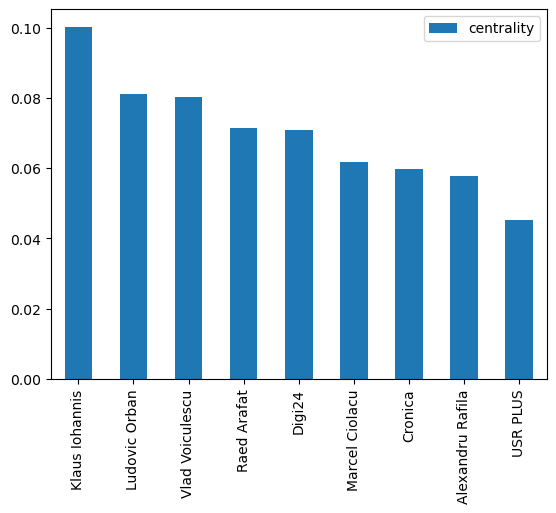

In [217]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

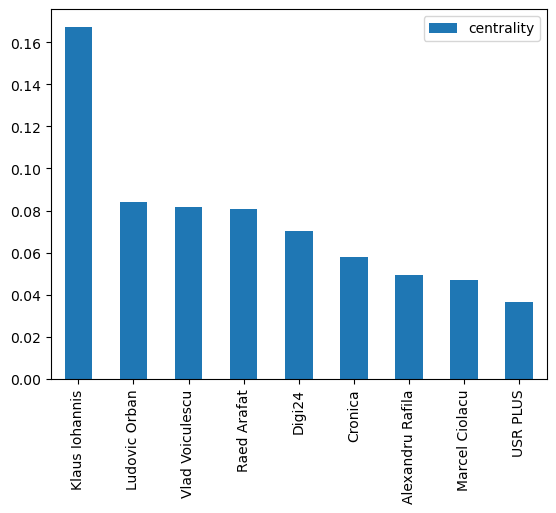

In [163]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

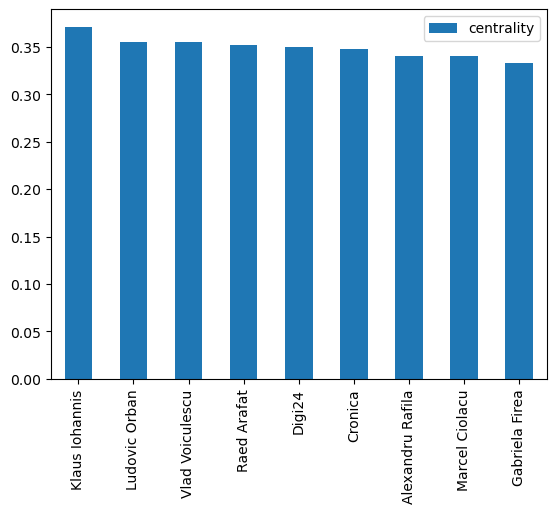

In [164]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

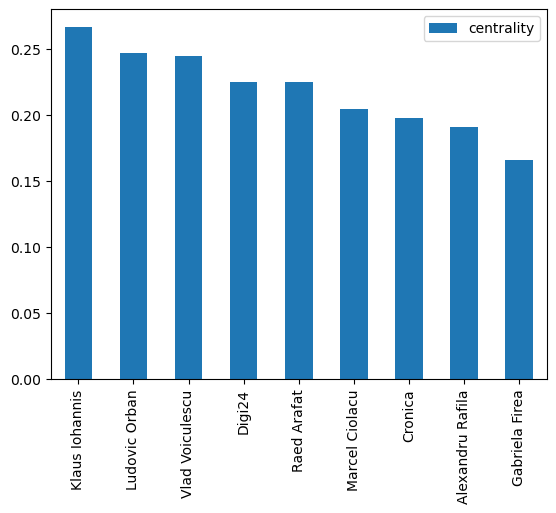

In [175]:
# Eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)
eigenvector_df = pd.DataFrame.from_dict(eigenvector_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
eigenvector_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [202]:
shortest_path = nx.shortest_path(G,"Parintele Calistrat","Digi24")
shortest_path

['Parintele Calistrat', 'Raed Arafat', 'Digi24']

In [179]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

Klaus Iohannis 0.16738163578564408
Ludovic Orban 0.08401786093818173
Vlad Voiculescu 0.08173125630907645
Raed Arafat 0.08072807374641586
Digi24 0.07026818431370889
Cronica 0.05770229175054258
Alexandru Rafila 0.049506403923223176
Marcel Ciolacu 0.046787264581110044
USR PLUS 0.03654061235050053
Maia Sandu 0.03516789651828316
Orange 0.030973546082238727
Banca Transilvania 0.02971864355633515
PRO TV 0.02667588536035156
Raluca Turcan 0.025472446078202496
Daruieste Viata 0.024716719076069527
Dan Barna 0.024576195588050097
Antena 3 0.024508391346316192
Clotilde Armand 0.02173523724781104
TVR Moldova 0.019997358175173945
Romania TV 0.019577908865929385
Libertatea 0.01906845270268429
Expirat 0.018768449676985037
Emil Boc 0.018192740902083282
Bucharest 0.017809876650497096
Gabriela Firea 0.017689440346769204
Guvernul Republicii Moldova 0.01710190542230849
BCR 0.016967383204017413
Universitatea Craiova 0.01595952660985224
Lucian Bode 0.015873507787412283
Victor Ponta 0.015729576398107795
Virgil 

In [206]:
page_rank = nx.pagerank(G)
page_rank

{'Orange': 0.0031978666508739816,
 'Telekom Romania Mobile': 0.0009149918334902394,
 'Klaus Iohannis': 0.015313623651060865,
 'Victor Costache': 0.0022671114064604972,
 'Ludovic Orban': 0.012019619058265736,
 'Raed Arafat': 0.010958740543334513,
 'Violeta Alexandru': 0.0021920819035587302,
 'Radauti': 0.00247659413601216,
 'Via Transilvanica': 0.0005558981883008683,
 'Rogob': 0.000977602260297092,
 'Victoriabank': 0.000540005454213594,
 'Tucano Coffee': 0.000540005454213594,
 'Casa Share': 0.0001950104991474884,
 'Mihai Chirica': 0.002493505259248015,
 'Peluza Nord Craiova': 0.0003349391829184909,
 'Universitatea Craiova': 0.002850991660835051,
 'Dacia': 0.0006771306271133497,
 'Renault': 0.0008744799668810564,
 'Banca Transilvania': 0.004862605017882692,
 'OMV Petrom': 0.002411781873447844,
 'Cristina Iurisniti': 0.0006121244449100719,
 'George Marussi': 0.0002983292087028894,
 'Iulian Bulai': 0.0011837241831496655,
 'Vlad Alexandrescu': 0.0004917062107496786,
 'Cristian Ghica': 0.000

In [208]:
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:20]

[('Klaus Iohannis', 0.015313623651060865),
 ('Ludovic Orban', 0.012019619058265736),
 ('Vlad Voiculescu', 0.01166795390691476),
 ('Raed Arafat', 0.010958740543334513),
 ('Digi24', 0.01026124453485087),
 ('Marcel Ciolacu', 0.008782173285935151),
 ('Alexandru Rafila', 0.008530636157217506),
 ('Cronica', 0.008318191854861977),
 ('USR PLUS', 0.006842231715103782),
 ('Antena 3', 0.005842047873178144),
 ('Libertatea', 0.005099745740500651),
 ('Raluca Turcan', 0.004993713449121766),
 ('Dan Barna', 0.004970393767016395),
 ('Gabriela Firea', 0.004962548248946942),
 ('Banca Transilvania', 0.004862605017882692),
 ('Maia Sandu', 0.004600996664680925),
 ('Emil Boc', 0.004288492612696467),
 ('Clotilde Armand', 0.0041173785640391),
 ('Lucian Bode', 0.00399812435298262),
 ('Expirat', 0.003983892866252101)]

In [185]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict
# Initialize the defaultdict: recommended
recommended = defaultdict(int)
# Iterate over all the nodes in G
for n, d in G.nodes(data = True):
# Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        # Increment recommended
            recommended[(n1, n2)] += 1
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('Ludovic Orban', 'Mihai Chirica'), ('Ludovic Orban', 'Cseke Attila'), ('Libertatea', 'Vlad Voiculescu'), ('Raed Arafat', 'Emil Boc'), ('Cronica', 'Antena 3'), ('Cronica', 'George Simion')]


In [186]:
print(nx.info(G))

Graph with 1458 nodes and 3512 edges


C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_59552\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [205]:
group1 = nx.bfs_tree(G,"ACADEMIA DE STUDII ECONOMICE DIN BUCURESTI")
group1

In [189]:
from pyvis.network import Network
net = Network(notebook = True, cdn_resources='remote', width="1000px", height="700px", bgcolor='#222222', font_color='white',select_menu=True, filter_menu=True)

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(group1)

net.show("nod_selectat.html")

nod_ASE.html


In [168]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [170]:
from community import community_louvain

In [ ]:
import community as community_louvain

In [171]:
communities = community_louvain.best_partition(G)
communities

{'Orange': 11,
 'Telekom Romania Mobile': 11,
 'Klaus Iohannis': 1,
 'Victor Costache': 2,
 'Ludovic Orban': 2,
 'Raed Arafat': 3,
 'Violeta Alexandru': 2,
 'Radauti': 4,
 'Via Transilvanica': 19,
 'Rogob': 6,
 'Victoriabank': 6,
 'Tucano Coffee': 6,
 'Casa Share': 2,
 'Mihai Chirica': 2,
 'Peluza Nord Craiova': 7,
 'Universitatea Craiova': 7,
 'Dacia': 14,
 'Renault': 14,
 'Banca Transilvania': 11,
 'OMV Petrom': 11,
 'Cristina Iurisniti': 2,
 'George Marussi': 2,
 'Iulian Bulai': 2,
 'Vlad Alexandrescu': 4,
 'Cristian Ghica': 4,
 'Bogdan Rodeanu': 4,
 'Daniel Popescu': 4,
 'Radu Mihail': 4,
 'Dan Barna': 2,
 'Click.ro': 10,
 'Dana Rogoz': 10,
 'Autonom': 11,
 'Spitalul Clinic Colentina': 11,
 'Pago': 11,
 'SmartBill Romania': 11,
 'COTNARI': 11,
 'Mastercard': 11,
 'Andrei Carabelea': 4,
 'Daniel Ciungu': 4,
 'TeraPlast': 11,
 'Andra': 10,
 'Asociatia pentru Relatii Comunitare': 11,
 'TIFF': 12,
 'Electric Castle': 12,
 'Jazz in the Park': 12,
 'Agent Green': 11,
 'Costel Alexe': 2,


In [172]:
nx.set_node_attributes(G, communities, 'group')

In [204]:
com_net = Network(notebook = True, cdn_resources='remote', width="1000px", height="700px", bgcolor='#222222', font_color='white',select_menu=True, filter_menu=True )
com_net.from_nx(G)
com_net.show("retea_communitati.html")

retea_communitati.html
